# Нахождение собственных значений методом степенных итераций

Импортируем всё, что нам понадобится

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rndm = np.random.RandomState(1)

Введём функцию, которая будет давать нам гамильтониан в зависимости от количества точек в нашей сетке

In [2]:
def Hamilt(n):
    H = np.zeros([n,n])
    for j in range(n-2):
        i = j + 1
        H[i,i] = -2
        H[i, i - 1] = H[i, i + 1] = 1
    return H

Введём функцию, которая будет силами давать нам собственные значения и вектора, округлённые до третьего знака, получив их с большей точностью. Это пригодится для упрощения сравнивания

In [3]:
def okrugl(valvec):
    val = valvec[0]
    vec = valvec[1]
    vec = np.round(vec, 3)
    val = np.round(val, 3)
    return val, vec

Теперь введём ту самую функцию, ради которой мы здесь собрались

In [4]:
def powit(A, n = 10):
    Ashape = A.shape
    vec = rndm.rand(Ashape[0])  
    for i in range(n):
        vec_ = A @ vec
        vec = vec_ / np.linalg.norm(vec_)
    val = (vec.T @ A @ vec) / (vec.T @ vec)
    return val, vec

Посмотрим, как она справляется с поиском собственных значений и векторов

In [5]:
H = Hamilt(5)

true = okrugl(np.linalg.eig(H))
whoknows = okrugl(powit(H))
print(true)
print(whoknows)

(array([-3.414, -2.   , -0.586,  0.   ,  0.   ]), array([[ 0.   ,  0.   ,  0.   ,  0.73 ,  0.   ],
       [ 0.5  ,  0.707, -0.5  ,  0.548,  0.183],
       [-0.707,  0.   , -0.707,  0.365,  0.365],
       [ 0.5  , -0.707, -0.5  ,  0.183,  0.548],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.73 ]]))
(-3.414, array([ 0.   ,  0.502, -0.707,  0.498,  0.   ]))


Как видим, с поиском векторов он справляется так себе. Это связано с тем, что вид нашей матрицы не позволит собственным векторам, вычисленным таким способом, иметь ненулевые первую и последнюю компоненты. Загуглив этот алгоритм, выясняем, что получаем вектор, присоединённый к собсвенному. Зато собственное значение вычислено точно. Посмотрим, как меняется относительная ошибка с ростом n. Гамильтониан размрености 2 и 1 тривиален, поэтому начнём считать сразу с 3

<IPython.core.display.Javascript object>


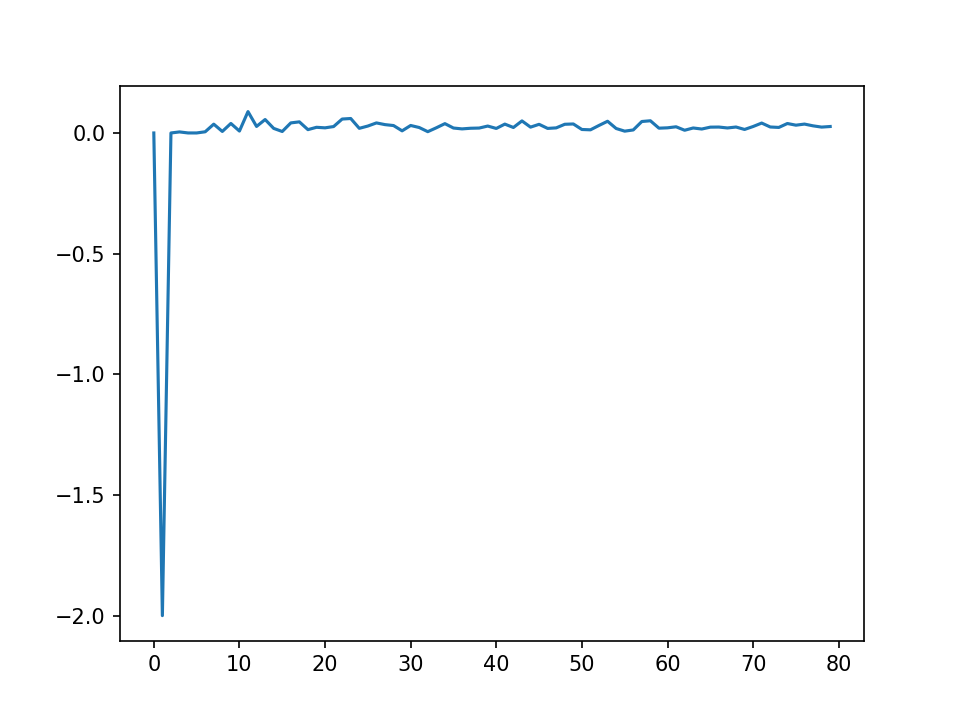

In [6]:
H = [Hamilt(i + 3) for i in range(80)]
true = np.array([np.linalg.eig(i)[0][0] for i in H])
whoknows = np.array([powit(i)[0] for i in H])
err = 1 - whoknows / true

%matplotlib notebook
plt.plot(err)
plt.show()

Видим, что для первых двух точек ошибка очень большая, однако эти точки соответсвуют очень крупной сетки, так что уберём их и посмотрим на ошибку дальше

<IPython.core.display.Javascript object>


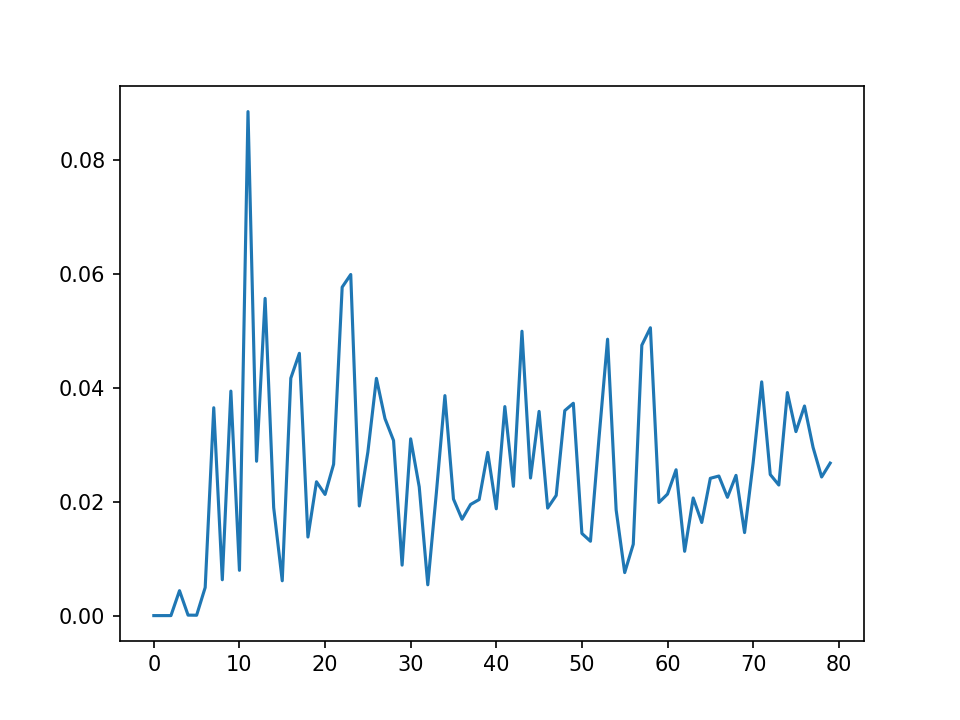

0.025632610497940862


In [7]:
err[0] = err[1] = 0
mean = np.mean(err)
%matplotlib notebook
plt.plot(err)
plt.show()
print(mean)

Видим, что ошибка не достигает десяти процентов, а в среднем случайным образом колеблется около двух с половиной. Посмотрим, что будет, если увеличить число итераций

<IPython.core.display.Javascript object>


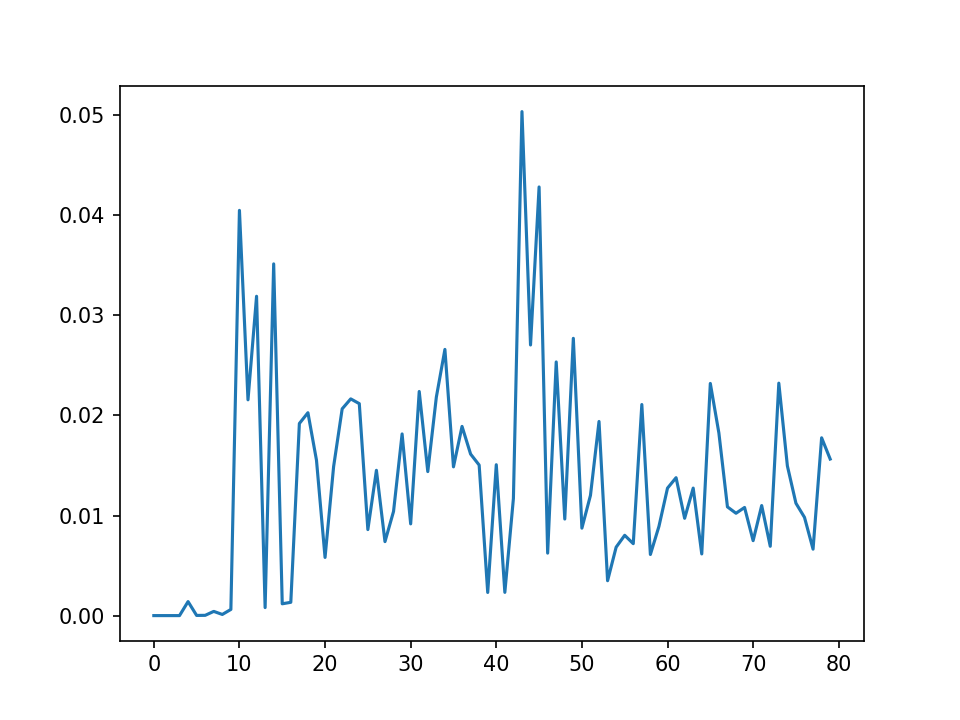

0.01335189960931556


In [8]:
whoknows = np.array([powit(i, 20)[0] for i in H])
err = 1 - whoknows / true
err[0] = err[1] = 0
mean = np.mean(err)

%matplotlib notebook
plt.plot(err)
plt.show()
print(mean)

При увеличении числа иттераций в два раза средняя ошибка так же падает в два раза. Посмотрим, как меняется ошибка в зависмости от числа итераций

<IPython.core.display.Javascript object>


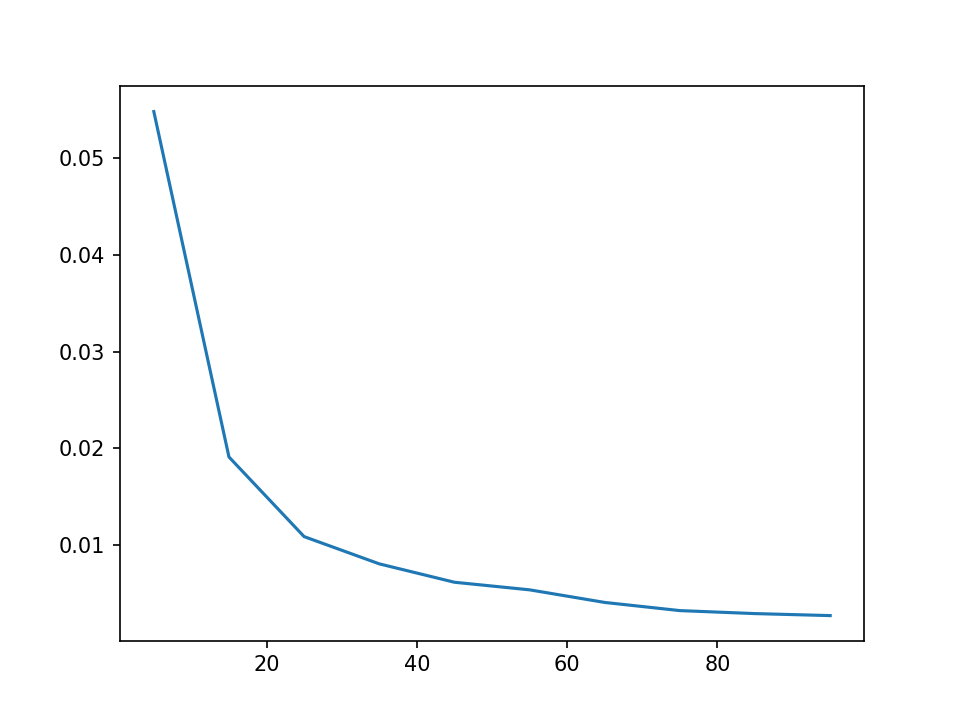

In [9]:
mean = np.zeros(10) 
def err_n(n):
    whoknows = np.array([powit(i, n)[0] for i in H])
    err = 1 - whoknows / true
    err[0] = err[1] = 0
    return np.mean(err)
    
mean = [err_n(5 + i*10) for i in range(10)]
n = [5 + i*10 for i in range(10)]
%matplotlib notebook
plt.plot(n, mean)
plt.show()

Как видим, средняя относительная ошибка быстро падает до одного процента, но дальнейшее уменьшение происходит гораздо медленнее